# Vegetable_Recognizer

The goal of this project is to classify 15 different types of vegetble that are commonly found in the market.The following are:

    1. Carrots
    2. Tomatoes
    3. Lettuce
    4. Spinach
    5. Broccoli
    6. Cucumbers
    7. Bell Peppers
    8. Potatoes
    9. Onions
    10. Garlic
    11. Zucchini
    12. Cabbage
    13. Kale
    14. Radishes
    15. Avocado








# Setting Up Necessary Things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [2]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:00


In [3]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/My Drive/Master_Course/Vegetable_Recognizer

/content/drive/My Drive/Master_Course/Vegetable_Recognizer


# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [8]:
doc(search_images_ddg)

In [9]:
veg_labels=[
"Carrots",
"Tomatoes",
"Lettuce",
"Spinach",
"Broccoli",
"Cucumbers",
"Bell Peppers",
"Potatoes",
"Onions",
"Garlic",
"Zucchini",
"Cabbage",
"Kale",
"Radishes",
"Avocado"
]
len(veg_labels)


15

In [10]:
images = search_images_ddg(veg_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.herbazest.com/imgs/d/6/e/135968/growing_carrot.jpg'

In [11]:
doc(download_url)

In [16]:
dest = "Carrots.jpg"
download_url(images[0], dest, show_progress=False)

Path('Carrots.jpg')

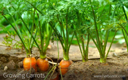

In [17]:
image = Image.open(dest)
image.to_thumb(128, 128)

# Combine all of them

In [18]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for veg_type in veg_labels:

  dest = f"{data_path}/{veg_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    veg_image_urls = search_images_ddg(veg_type)
    download_images(dest, urls = veg_image_urls)

  except:
    continue

In [19]:
image_counts = get_image_files(data_path)
image_counts

(#2885) [Path('data/Carrots/dc5feafe-d6d6-43de-8c7e-8cc272d7d3ee.jpg'),Path('data/Carrots/310317f2-91d6-4ed1-bd8e-94c23c0dacee.jpeg'),Path('data/Carrots/ca29cf57-24fc-45dc-87ba-3c5ae2400ed0.jpg'),Path('data/Carrots/788404dc-0976-4e72-800f-591e29f1ee51.jpg'),Path('data/Carrots/99219dc3-ee6e-4adb-98f6-8ccc7ab81ab6.jpg'),Path('data/Carrots/119da3d7-01e9-4d65-b810-6f91a60feacc.jpg'),Path('data/Carrots/5f8cf48a-30cc-452b-bcd4-b07b84afab23.jpg'),Path('data/Carrots/1c4e3b64-07ee-4130-bcab-ec3b0c2b2669.jpg'),Path('data/Carrots/f5afcde7-b1fc-48c2-891e-0e61d47e98a4.jpg'),Path('data/Carrots/f176c97f-dc9b-41e3-8062-b5697d5a91d7.jpg')...]

In [20]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#63) [Path('data/Carrots/ab6c8671-f10b-48df-a598-f11a3d234d51.jpg'),Path('data/Carrots/bb8dc792-13e5-48f3-8f60-09d6665392b7.jpg'),Path('data/Carrots/e0c3ac2c-45a0-4be2-8853-580fe0972241.jpg'),Path('data/Carrots/7c122ba7-64c8-40cc-9ec9-36c0922a95ed.jpg'),Path('data/Tomatoes/5f8d902b-d3bb-4b60-97fd-9f4e85e5fe73.jpg'),Path('data/Tomatoes/6b456298-1d9f-438d-afd7-e868858d6189.jpg'),Path('data/Lettuce/1c65247c-1b8c-4326-b32b-00816d90a4df.jpg'),Path('data/Lettuce/7f9277e6-281f-4624-ab55-cc4c0f9770b7.jpg'),Path('data/Lettuce/46a1cd5a-d957-4884-9fa2-25d995e05eae.jpg'),Path('data/Lettuce/7e106a18-7c32-48f6-b3af-73c3a1d0d048.jpg')...]

In [21]:
failed.map(Path.unlink)

(#63) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [22]:
doc(get_image_files)

In [23]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [24]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


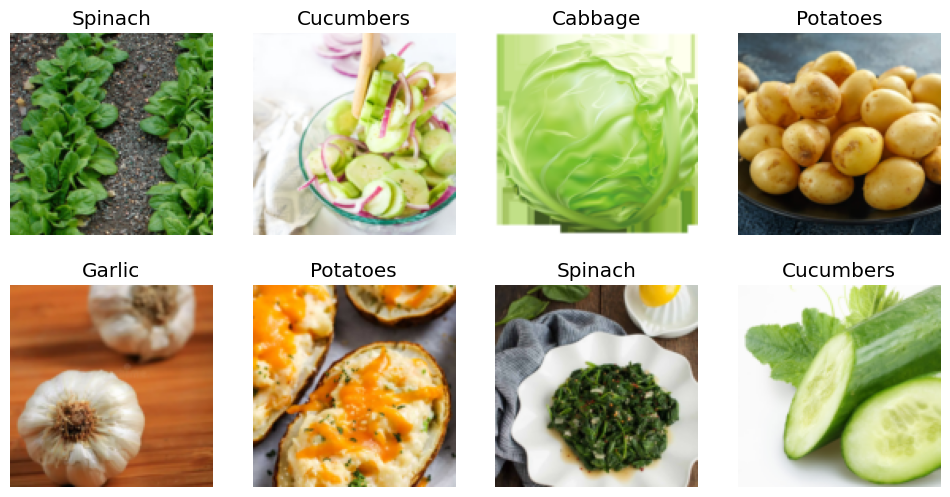

In [25]:
dls.train.show_batch(max_n=8, nrows=2)

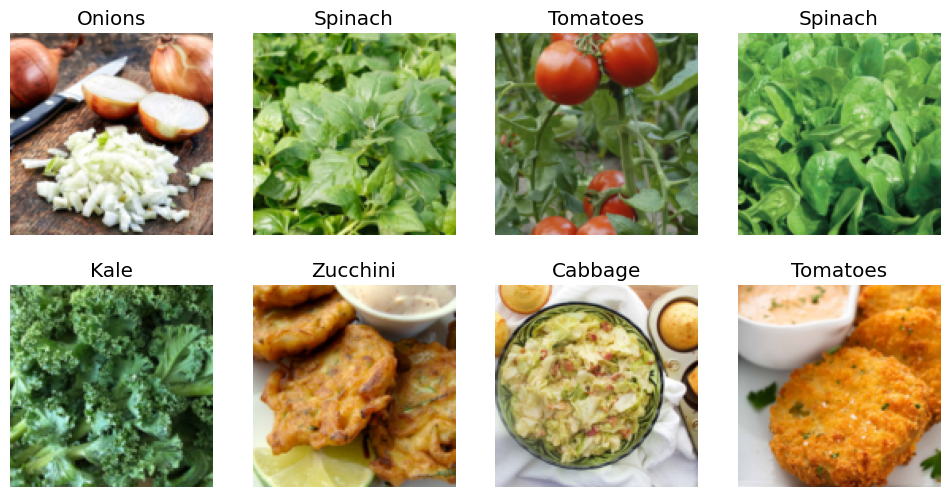

In [26]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

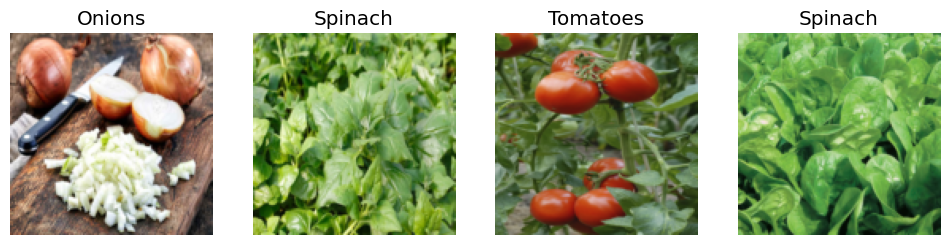

In [27]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

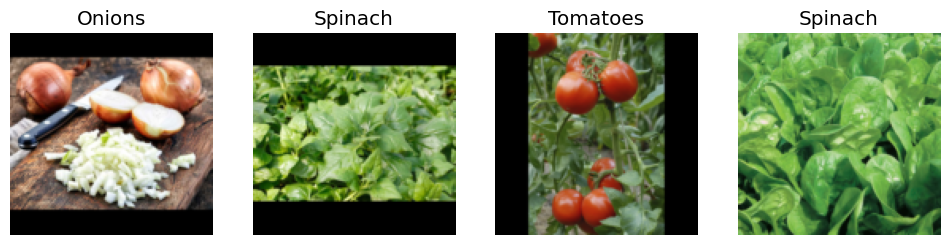

In [28]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

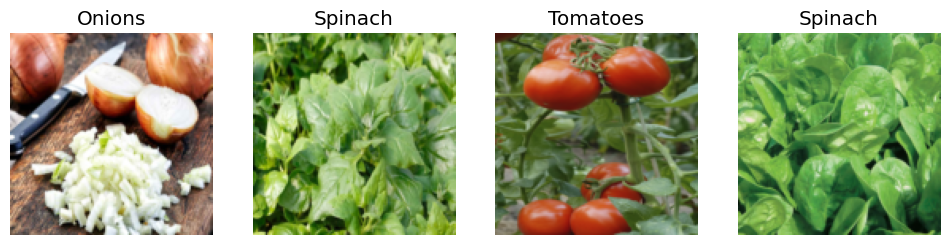

In [29]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [30]:
doc(aug_transforms)

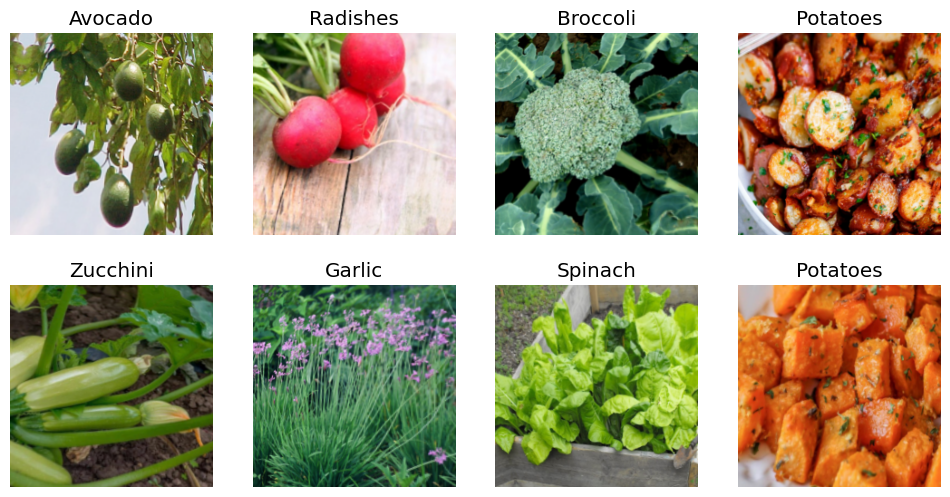

In [31]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [32]:
torch.save(dls, "veg_dataloader_v0.pkl")